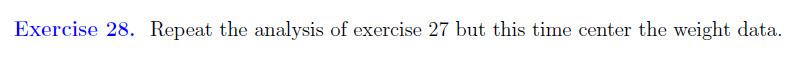

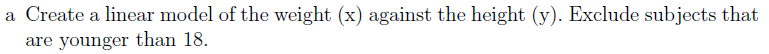

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import pymc3 as pm

In [8]:
def get_filtered_data():
    data = pd.read_csv("howell.csv")
    return data[data['age'] >=18]

In [9]:
filtered_data = get_filtered_data()
weight = filtered_data["weight"]
height = filtered_data["height"]

In [10]:
x = weight
y = height

C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 44 seconds.


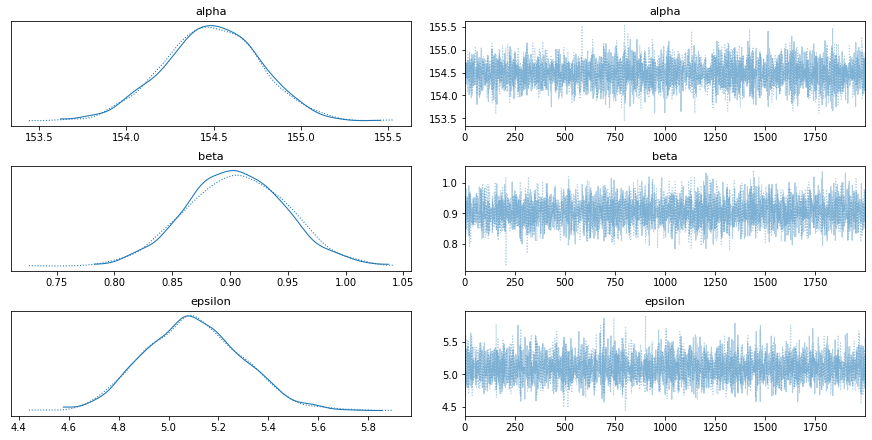

In [11]:
x_centered = x-np.average(x)
with pm.Model() as over_18_heights:
  alpha = pm.Normal("alpha", sd=10)
  beta = pm.Normal("beta", sd=10)
  epsilon = pm.HalfNormal("epsilon", sd=10)

  mu = pm.Deterministic("mu", alpha + beta * x_centered )

  height_pred = pm.Normal("height_pred", mu=mu, sd=epsilon, observed=y)
  trace_centered = pm.sample(2000)
  az.plot_trace(trace_centered, var_names=['alpha','beta','epsilon'])

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

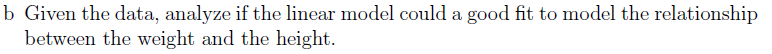

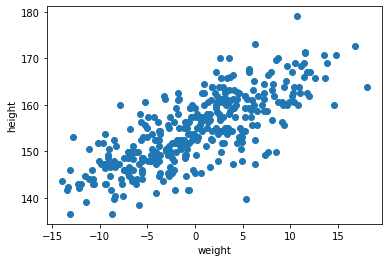

In [12]:
plt.scatter(x_centered, y)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

We find that height increases,weight increases also. From visual inspection, it looks like a linear fit with some noise is best.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

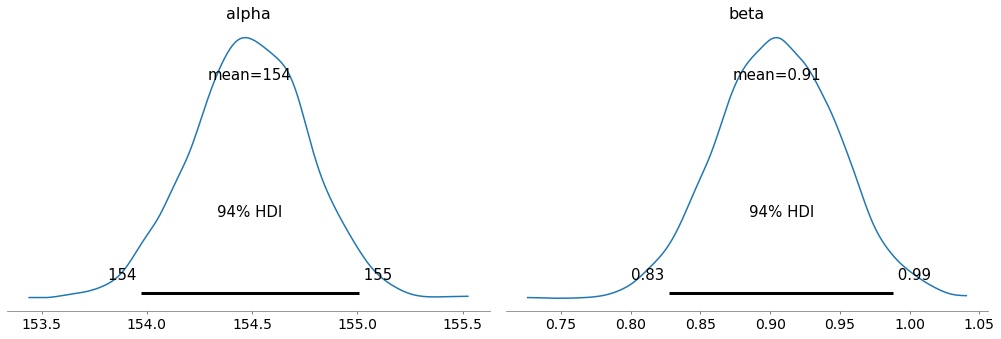

In [13]:
az.plot_posterior(az.from_pymc3(trace_centered, model=over_18_heights), var_names=['alpha', 'beta'])
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
# Part d
# Obtaining the mean value of alpha and beta
alpha_m = trace_centered['alpha'].mean()
beta_m = trace_centered['beta'].mean()
print(alpha_m)
print(beta_m)

154.4859889780516
0.9052354267647938


C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\stats\stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


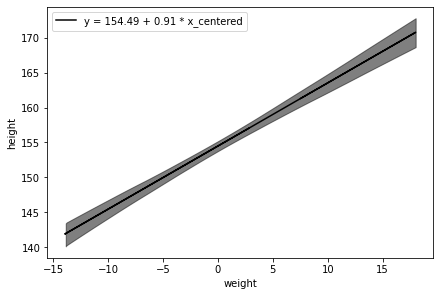

In [28]:
ax = az.plot_hdi(x_centered, trace_centered['mu'], hdi_prob=0.99, color='k')
ax.set_xlabel('weight')
ax.set_ylabel('height')
# Plot the regression line
ax.plot(x_centered, alpha_m + beta_m * x_centered, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x_centered')
ax.legend()
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

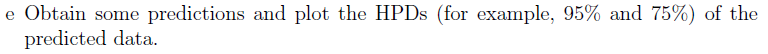

In [31]:
# With this line we obtain some predictions
ppc = pm.sample_posterior_predictive(trace_centered, samples=2000, model=over_18_heights)

C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\stats\stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\stats\stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


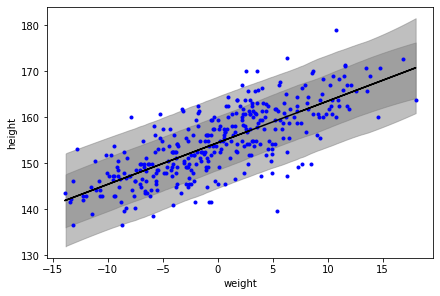

In [32]:
# We plot the 75% HDI of the predicted data
ax = az.plot_hdi(x_centered, ppc['height_pred'], hdi_prob=0.75, color='gray')
# and the 95% HDI of the predicted data
az.plot_hdi(x_centered, ppc['height_pred'], hdi_prob=0.95, color='gray', ax=ax)
# This is just to plot the original data
plt.plot(x_centered, y, 'b.')
# This is to plot the regression line
plt.plot(x_centered, alpha_m + beta_m * x_centered, c='k',
         label=f'x_centered = {alpha_m:.2f} + {beta_m:.2f} * x_centered')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

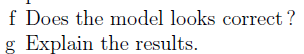


Yes, it looks like correct.
And the 99% interval of the posterior predictive checks covers most of the distribution. Overall, it looks like a linear fit is great for height vs weight for people over 18.